In [1]:
# 首先 import 必要的模块
import pandas as pd 
import numpy as np

from sklearn.model_selection import GridSearchCV

#竞赛的评价指标为logloss
from sklearn.metrics import log_loss  

from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

In [3]:
# 读取数据
# path to where the data lies
dpath = '../data/'
train = pd.read_csv(dpath +"incomeClassTrainMapped.csv")
train.head()

,Unnamed: 0,Age,workclass,People,Education,EduNum,Marriage,WorkType,Family,Race,Sex,capitalgain,capitalloss,hours,Country,Income
0,0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


In [4]:
train.describe()

,Unnamed: 0,Age,workclass,People,Education,EduNum,Marriage,WorkType,Family,Race,Sex,capitalgain,capitalloss,hours,Country,Income
count,32561.000000,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,16280.000000,38.581647,2.309972,1.897784e+05,3.424465,10.080679,1.083781,4.666411,1.542397,0.221707,0.330795,1077.648844,87.303830,40.437456,1.290317,0.240810
std,9399.695394,13.640433,1.225728,1.055500e+05,3.453582,2.572720,1.251381,3.386119,1.437431,0.627348,0.470506,7385.292085,402.960219,12.347429,5.045373,0.427581
min,0.000000,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,8140.000000,28.000000,2.000000,1.178270e+05,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,16280.000000,37.000000,2.000000,1.783560e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,24420.000000,48.000000,2.000000,2.370510e+05,5.000000,12.000000,1.000000,7.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,32560.000000,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


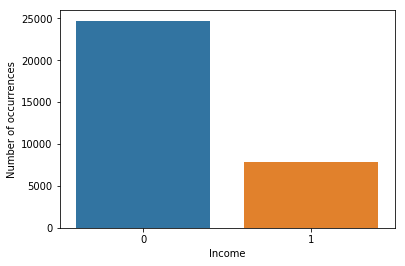

In [5]:
# Target 分布，看看各类样本分布是否均衡
sns.countplot(train["Income"]);
pyplot.xlabel('Income');
pyplot.ylabel('Number of occurrences');

In [6]:
y_train = train["Income"]

train = train.drop(["Income"], axis=1)
X_train = np.array(train)
X_train

array([[    0,    39,     0, ...,     0,    40,     0],
       [    1,    50,     1, ...,     0,    13,     0],
       [    2,    38,     2, ...,     0,    40,     0],
       ...,
       [32558,    58,     2, ...,     0,    40,     0],
       [32559,    22,     2, ...,     0,    20,     0],
       [32560,    52,     6, ...,     0,    40,     0]])

In [7]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

# 初始化特征的标准化器
ss_X = StandardScaler()

# 分别对训练和测试数据的特征进行标准化处理
X_train = ss_X.fit_transform(X_train)
X_train

/usr/local/python36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.73199761,  0.03067056, -1.88460023, ..., -0.21665953,
        -0.03542945, -0.25574647],
       [-1.73189123,  0.83710898, -1.0687461 , ..., -0.21665953,
        -2.22215312, -0.25574647],
       [-1.73178484, -0.04264203, -0.25289198, ..., -0.21665953,
        -0.03542945, -0.25574647],
       ...,
       [ 1.73178484,  1.42360965, -0.25289198, ..., -0.21665953,
        -0.03542945, -0.25574647],
       [ 1.73189123, -1.21564337, -0.25289198, ..., -0.21665953,
        -1.65522476, -0.25574647],
       [ 1.73199761,  0.98373415,  3.01052452, ..., -0.21665953,
        -0.03542945, -0.25574647]])

In [8]:
train.shape

(32561, 15)

In [9]:
from sklearn.model_selection import train_test_split

X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, train_size = 0.8,random_state = 0)

X_train_part

/usr/local/python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


array([[-0.10617528, -0.18926719, -0.25289198, ..., -0.21665953,
        -0.03542945, -0.25574647],
       [ 0.91387343, -0.26257978, -0.25289198, ..., -0.21665953,
         1.09842727, -0.25574647],
       [ 0.27043845, -0.04264203, -0.25289198, ..., -0.21665953,
         0.77446821, -0.25574647],
       ...,
       [-0.68460717, -1.14233079, -0.25289198, ..., -0.21665953,
        -0.03542945, -0.25574647],
       [-0.58311296,  0.47054606,  1.37881627, ..., -0.21665953,
         0.36951938, -0.25574647],
       [-1.44134543, -0.99570562, -0.25289198, ..., -0.21665953,
         0.61248868, -0.25574647]])

In [12]:
from sklearn.svm import LinearSVC
def fit_grid_point_Linear(C, X_train, y_train, X_val, y_val):
    
    # 在训练集是那个利用SVC训练
    SVC2 =  LinearSVC( C = C)
    SVC2 = SVC2.fit(X_train, y_train)
    
    # 在校验集上返回accuracy
    accuracy = SVC2.score(X_val, y_val)
    
    print("fit_grid_point_Linear accuracy: {}".format(accuracy))
    return accuracy

logspace C_s  [1.00000000e-03 4.64158883e-03 2.15443469e-02 1.00000000e-01
 4.64158883e-01 2.15443469e+00 1.00000000e+01 4.64158883e+01
 2.15443469e+02 1.00000000e+03]
fit_grid_point_Linear accuracy: 0.8209734377399048
fit_grid_point_Linear accuracy: 0.8215875940426839
fit_grid_point_Linear accuracy: 0.8223552894211577
fit_grid_point_Linear accuracy: 0.822201750345463
fit_grid_point_Linear accuracy: 0.822201750345463
fit_grid_point_Linear accuracy: 0.8220482112697681
fit_grid_point_Linear accuracy: 0.8192845079072624
fit_grid_point_Linear accuracy: 0.790879778903731
fit_grid_point_Linear accuracy: 0.6803316444035007


No handles with labels found to put in legend.


fit_grid_point_Linear accuracy: 0.6457853523721787


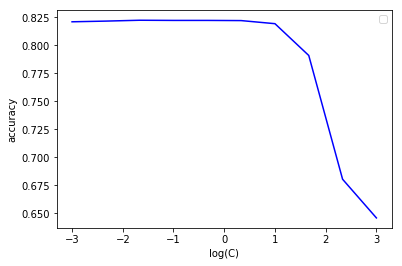

In [13]:
#需要调优的参数
C_s = np.logspace(-3, 3, 10)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份  
print("logspace C_s ", C_s)
      
accuracy_s = []
for i, oneC in enumerate(C_s):
    tmp = fit_grid_point_Linear(oneC, X_train, y_train, X_val, y_val)
    accuracy_s.append(tmp)

x_axis = np.log10(C_s)
pyplot.plot(x_axis, np.array(accuracy_s), 'b-')
    
pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( 'accuracy' )

pyplot.show()

RBF核SVM正则参数调优

RBF核是SVM最常用的核函数（没有之一）。 RBF核SVM 的需要调整正则超参数包括C（正则系数，一般在log域（取log后的值）均匀设置候选参数）和核函数的宽度gamma C越小，决策边界越平滑； gamma越小，决策边界越平滑。

采用交叉验证，网格搜索步骤与Logistic回归正则参数处理类似，在此略。

这里我们用校验集（X_val、y_val）来估计模型性能

In [21]:
from sklearn.svm import SVC
def fit_grid_point_RBF(C, gamma, X_train, y_train, X_val, y_val):
    
    # 在训练集是那个利用SVC训练
    SVC3 =  SVC( C = C, kernel='rbf', gamma = gamma)
    SVC3 = SVC3.fit(X_train, y_train)
    
    # 在校验集上返回accuracy
    accuracy = SVC3.score(X_val, y_val)
    print("param C:" + str(C) + " gamma:" + str(gamma))
    print("accuracy: {}".format(accuracy))
    return accuracy

In [22]:
#需要调优的参数
C_s = np.logspace(-2, 2, 8)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份 
gamma_s = np.logspace(-2, 2, 8)  

accuracy_s = []
for i, oneC in enumerate(C_s):
    for j, gamma in enumerate(gamma_s):
        tmp = fit_grid_point_RBF(oneC, gamma, X_train, y_train, X_val, y_val)
        accuracy_s.append(tmp)


param C:0.01 gamma:0.01
accuracy: 0.7683095347766007
param C:0.01 gamma:0.0372759372031494
accuracy: 0.7945647167204053
param C:0.01 gamma:0.13894954943731375
accuracy: 0.7868877629356671
param C:0.01 gamma:0.517947467923121
accuracy: 0.7597113465376938
param C:0.01 gamma:1.9306977288832496
accuracy: 0.7551051742668509
param C:0.01 gamma:7.196856730011514
accuracy: 0.7551051742668509
param C:0.01 gamma:26.826957952797247
accuracy: 0.7551051742668509
param C:0.01 gamma:100.0
accuracy: 0.7551051742668509
param C:0.0372759372031494 gamma:0.01
accuracy: 0.8025487486565331
param C:0.0372759372031494 gamma:0.0372759372031494
accuracy: 0.8265008444649163
param C:0.0372759372031494 gamma:0.13894954943731375
accuracy: 0.8186703516044833
param C:0.0372759372031494 gamma:0.517947467923121
accuracy: 0.780439121756487
param C:0.0372759372031494 gamma:1.9306977288832496
accuracy: 0.7551051742668509
param C:0.0372759372031494 gamma:7.196856730011514
accuracy: 0.7551051742668509
param C:0.037275937203

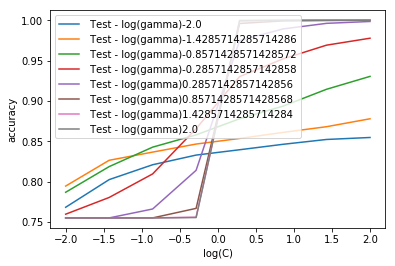

In [23]:
accuracy_s1 =np.array(accuracy_s).reshape(len(C_s),len(gamma_s))
x_axis = np.log10(C_s)
for j, gamma in enumerate(gamma_s):
    pyplot.plot(x_axis, np.array(accuracy_s1[:,j]), label = ' Test - log(gamma)' + str(np.log10(gamma)))

pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( 'accuracy' )

pyplot.show()